In [73]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#setting the number of neighbours
k = 5

In [74]:
iris_data = pd.read_csv('iris.csv')
iris_data = np.array(iris_data)

#here we will be only using only first and second column of iris_data, because we only 2 features to plot that data points.
#hence deleting the extra 2 columns

iris_data = np.delete(iris_data, 0,1)
iris_data = np.delete(iris_data, 0,1)


print(iris_data)

[[1.4 0.2 'Iris-setosa']
 [1.3 0.2 'Iris-setosa']
 [1.5 0.2 'Iris-setosa']
 [1.4 0.2 'Iris-setosa']
 [1.7 0.4 'Iris-setosa']
 [1.4 0.3 'Iris-setosa']
 [1.5 0.2 'Iris-setosa']
 [1.4 0.2 'Iris-setosa']
 [1.5 0.1 'Iris-setosa']
 [1.5 0.2 'Iris-setosa']
 [1.6 0.2 'Iris-setosa']
 [1.4 0.1 'Iris-setosa']
 [1.1 0.1 'Iris-setosa']
 [1.2 0.2 'Iris-setosa']
 [1.5 0.4 'Iris-setosa']
 [1.3 0.4 'Iris-setosa']
 [1.4 0.3 'Iris-setosa']
 [1.7 0.3 'Iris-setosa']
 [1.5 0.3 'Iris-setosa']
 [1.7 0.2 'Iris-setosa']
 [1.5 0.4 'Iris-setosa']
 [1.0 0.2 'Iris-setosa']
 [1.7 0.5 'Iris-setosa']
 [1.9 0.2 'Iris-setosa']
 [1.6 0.2 'Iris-setosa']
 [1.6 0.4 'Iris-setosa']
 [1.5 0.2 'Iris-setosa']
 [1.4 0.2 'Iris-setosa']
 [1.6 0.2 'Iris-setosa']
 [1.6 0.2 'Iris-setosa']
 [1.5 0.4 'Iris-setosa']
 [1.5 0.1 'Iris-setosa']
 [1.4 0.2 'Iris-setosa']
 [1.5 0.1 'Iris-setosa']
 [1.2 0.2 'Iris-setosa']
 [1.3 0.2 'Iris-setosa']
 [1.5 0.1 'Iris-setosa']
 [1.3 0.2 'Iris-setosa']
 [1.5 0.2 'Iris-setosa']
 [1.3 0.3 'Iris-setosa']


In [78]:
#deviding the data into training(80%) and testing(20%)
split = 0.8
split_by_class = math.floor((0.8)*50)

train1 = np.array(iris_data[0:split_by_class-1])
test1 = np.array(iris_data[split_by_class:49])

train2 = np.array(iris_data[50:50+(split_by_class-1)])
test2 = np.array(iris_data[50+split_by_class:99])

train3 = np.array(iris_data[100:100+(split_by_class-1)])
test3 = np.array(iris_data[100+split_by_class:149])

#making training and testing matrices

training = np.concatenate((train1,train2,train3))
testing = np.concatenate((test1,test2,test3))



In [79]:
#making sample

sample = np.delete(testing,2,1)
print(sample)
y_real = np.array([testing[:,2]])
y_real = y_real.T


[[1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.6 1.4]
 [4.0 1.2]
 [3.3 1.0]
 [4.2 1.3]
 [4.2 1.2]
 [4.2 1.3]
 [4.3 1.3]
 [3.0 1.1]
 [4.1 1.3]
 [5.1 2.3]
 [5.1 1.9]
 [5.9 2.3]
 [5.7 2.5]
 [5.2 2.3]
 [5.0 1.9]
 [5.2 2.0]
 [5.4 2.3]
 [5.1 1.8]]


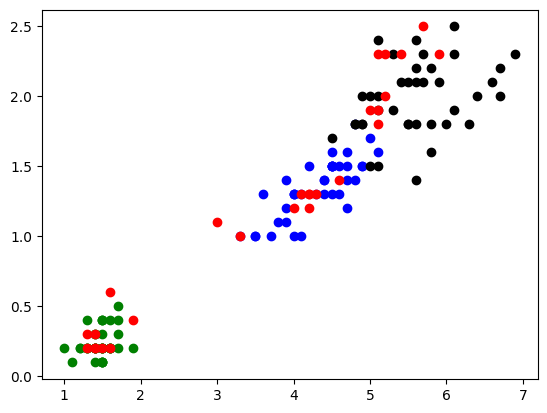

In [80]:
#plotting the data points and samples

plt.scatter(training[:,0][training[:,2]=='Iris-setosa'],training[:,1][training[:,2]=='Iris-setosa'], color='green')
plt.scatter(training[:,0][training[:,2]=='Iris-versicolor'],training[:,1][training[:,2]=='Iris-versicolor'], color='blue')
plt.scatter(training[:,0][training[:,2]=='Iris-virginica'],training[:,1][training[:,2]=='Iris-virginica'], color='black')

plt.scatter(sample[:,0],sample[:,1], color='red')
plt.show()



In [81]:
#classifying these samples into classes

y_predicted = []

for j in range(len(sample)):
    
    distance = np.array([])

    for i in range(len(training)):
        dis = np.sqrt((sample[j][0] - training[i][0])**2 + (sample[j][1] - training[i][1])**2)
        distance = np.append(distance,dis)
    
    distance_arr = np.array([distance,training[:,-1]])
    distance_arr = distance_arr.T
    
    sorted_indices = np.argsort(distance_arr[:, 0])
    distance = distance_arr[sorted_indices]

    Iris_versicolor = 0
    Iris_setosa = 0
    Iris_virginica = 0
    
    for l in range(k):
        if(distance[l][1] == 'Iris-versicolor'):
            Iris_versicolor+=1
        elif(distance[l][1] == 'Iris-setosa'):
            Iris_virginica+=1
        else:
            Iris_setosa+=1
    
    if(Iris_versicolor > Iris_setosa and Iris_versicolor > Iris_virginica):
        y_predicted = np.append(y_predicted,'Iris-versicolor')
    elif(Iris_setosa > Iris_versicolor and Iris_setosa > Iris_virginica):
        y_predicted = np.append(y_predicted,'Iris-setosa')
    else:
        y_predicted = np.append(y_predicted,'Iris-virginica')
    
    #distance_arr = np.sort(distance_arr[:,0])
y_predicted = np.array([y_predicted])
y_predicted = y_predicted.T
print(y_predicted)
print(y_real)
correctly_classifiesd_samples = 0

for i in range(len(y_predicted)):
    if(y_predicted[i][0] == y_real[i][0]):
        correctly_classifiesd_samples+=1

accuracy = correctly_classifiesd_samples/len(sample)
print(accuracy)
        

[['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]
[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virgini